# Constant measures analysis

In [28]:
import cv2 
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from imageproc import get_pocillos, complete_the_grid, draw_circles, array_from_pic, circle_crop

In [29]:
os.chdir('/Users/guillemcobos/Library/CloudStorage/GoogleDrive-guillem.cobos@koabiotech.com/.shortcut-targets-by-id/1UQ_YnLRmoAqhCue-qXYNP9QhYorsiAxS/KOA Biotech/01. AUTOMATA LAB/PROVA ABS/CT ABS')
files = os.listdir('pics')
image_files = sorted([file for file in files if file.endswith((".jpg", ".jpeg", ".png", ".gif"))])  

In [30]:
def remove_outliers(data):
    q1, q3 = np.percentile(data, [25, 75])
    iqr = q3 - q1
    lower_bound = q1 - (1.5 * iqr)
    upper_bound = q3 + (1.5 * iqr)
    return np.clip(data, lower_bound, upper_bound)

In [31]:
high_od_cam2 = '/Users/guillemcobos/Library/CloudStorage/GoogleDrive-guillem.cobos@koabiotech.com/.shortcut-targets-by-id/1UQ_YnLRmoAqhCue-qXYNP9QhYorsiAxS/KOA Biotech/01. AUTOMATA LAB/PROVA ABS/CT ABS/Picture_s_10M5_#1_2023-05-10_18:36:28_P1_Cam2.jpg'
low_od_cam2 = '/Users/guillemcobos/Library/CloudStorage/GoogleDrive-guillem.cobos@koabiotech.com/.shortcut-targets-by-id/1UQ_YnLRmoAqhCue-qXYNP9QhYorsiAxS/KOA Biotech/01. AUTOMATA LAB/PROVA ABS/CT ABS/Picture_p_10M5_#1_2023-05-10_19:03:13_P2_Cam2.jpg'
high_od_cam3 = '/Users/guillemcobos/Library/CloudStorage/GoogleDrive-guillem.cobos@koabiotech.com/.shortcut-targets-by-id/1UQ_YnLRmoAqhCue-qXYNP9QhYorsiAxS/KOA Biotech/01. AUTOMATA LAB/PROVA ABS/CT ABS/Picture_s_10M5_#1_2023-05-10_18:36:29_P1_Cam3.jpg'
low_od_cam3 = '/Users/guillemcobos/Library/CloudStorage/GoogleDrive-guillem.cobos@koabiotech.com/.shortcut-targets-by-id/1UQ_YnLRmoAqhCue-qXYNP9QhYorsiAxS/KOA Biotech/01. AUTOMATA LAB/PROVA ABS/CT ABS/Picture_p_10M5_#1_2023-05-10_19:03:14_P2_Cam3.jpg' 

# High OD

In [ ]:
img = cv2.imread(high_od_cam2)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img_bw = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
circles = get_pocillos(img_bw)
new_circles = complete_the_grid(circles)
#new_circles = circles
draw_circles(img, new_circles)
grid_positions = new_circles[:,3:5]

### Blue channel, Blue pic

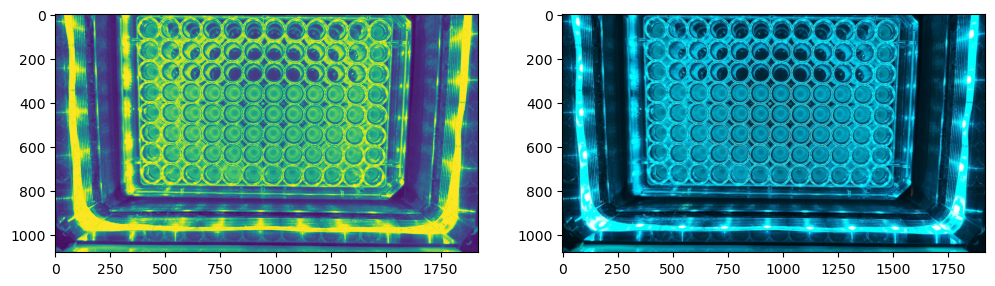

array([[146, 142, 121, 111, 100,  95,  96,  99, 108, 120, 131, 145],
       [163, 155, 155, 135, 123, 114, 112, 119, 132, 150, 156, 162],
       [158, 155, 141, 121, 103,  91,  92,  99, 113, 133, 152, 160],
       [157, 175, 172, 169, 166, 162, 161, 164, 170, 171, 174, 161],
       [168, 179, 173, 166, 161, 157, 158, 160, 163, 167, 171, 161],
       [162, 175, 171, 166, 160, 158, 156, 157, 161, 167, 172, 161],
       [162, 168, 166, 162, 161, 155, 157, 158, 160, 166, 169, 168],
       [156, 172, 160, 161, 182, 158, 157, 154, 156, 161, 172, 156]])

In [33]:
mean_output_array = np.zeros((8,12))
q_output_array = np.zeros((8,12))

for i, position in enumerate(grid_positions):
    cropped_pocillo = circle_crop(img, new_circles[i,0:3])
    cropped_pocillo = cropped_pocillo[:,:,2]
    pixel_values = cropped_pocillo[cropped_pocillo != 0].flatten()
    #pixel_values = remove_outliers(pixel_values)
    mean_output_array[position[0], position[1]] = np.mean(pixel_values)
    q_output_array[position[0], position[1]] = np.percentile(cropped_pocillo[cropped_pocillo != 0], 90)  

fig, axs = plt.subplots(1,2,figsize=(12, 12))   
axs[0].imshow(img[:,:,2])
axs[1].imshow(img)
plt.show()

#print(position)
#plt.imshow(cropped_pocillo)
#plt.show()

mean_output_array.astype(int)
#q_output_array.astype(int)

In [34]:
key_positions = mean_output_array[-5:, 1:11]
print("Mean:", round(np.mean(key_positions),1))
print("Standard deviation:", round(np.std(key_positions),1))

Mean: 165.2
Standard deviation: 6.7


### Saturation channel, white pic

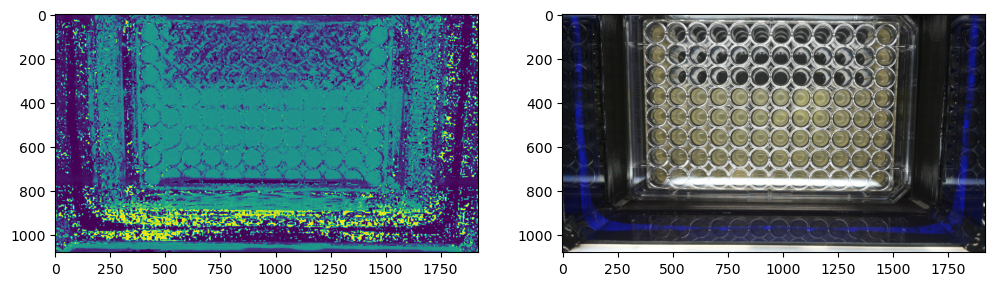

array([[47, 15, 12, 12, 13, 12, 12, 13, 12, 14, 16, 50],
       [47, 19, 13, 12, 12, 13, 12, 11, 12, 13, 18, 48],
       [52, 20, 13, 11, 11, 12, 12, 12, 14, 14, 19, 52],
       [54, 48, 44, 42, 41, 39, 38, 49, 53, 46, 49, 56],
       [62, 61, 59, 53, 52, 49, 55, 60, 59, 56, 55, 57],
       [52, 54, 53, 51, 49, 47, 53, 53, 56, 57, 57, 58],
       [50, 55, 53, 53, 52, 53, 55, 60, 56, 59, 58, 59],
       [52, 29, 29, 33, 42, 34, 34, 35, 35, 32, 30, 51]])

In [35]:
img = cv2.imread(high_od_cam3)
hsv = cv2.cvtColor(img, cv2.COLOR_RGB2HSV)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)


mean_output_array = np.zeros((8,12))
q_output_array = np.zeros((8,12))

for i, position in enumerate(grid_positions):
    cropped_pocillo = circle_crop(hsv, new_circles[i,0:3])
    cropped_pocillo = cropped_pocillo[:,:,1]
    pixel_values = cropped_pocillo[cropped_pocillo != 0].flatten()
    pixel_values = remove_outliers(pixel_values)
    mean_output_array[position[0], position[1]] = np.mean(pixel_values)
    q_output_array[position[0], position[1]] = np.percentile(cropped_pocillo[cropped_pocillo != 0], 90)  

fig, axs = plt.subplots(1,2,figsize=(12, 12))   
axs[0].imshow(hsv[:,:,0])
axs[1].imshow(img)
plt.show()

#print(position)
#plt.imshow(cropped_pocillo)
#plt.show()

mean_output_array.astype(int)
#q_output_array.astype(int)

**Alerta** Sembla que això és sensible als reflexos. He tret la última fila!

In [36]:
key_positions = mean_output_array[3:7, 1:11] 
print("Mean:", round(np.mean(key_positions),1))
print("Standard deviation:", round(np.std(key_positions),1))

Mean: 52.8
Standard deviation: 5.7


# Low OD

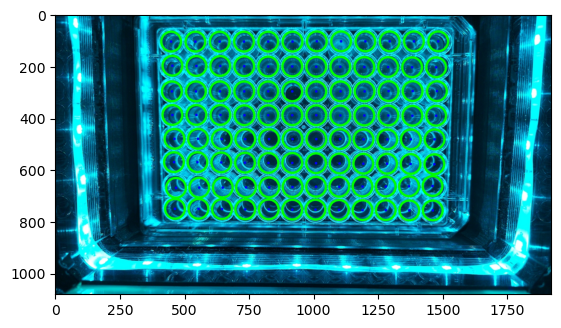

In [37]:
img = cv2.imread(low_od_cam2)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img_bw = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
circles = get_pocillos(img_bw)
new_circles = complete_the_grid(circles)
draw_circles(img, new_circles)
grid_positions = new_circles[:,3:5]

### Blue average

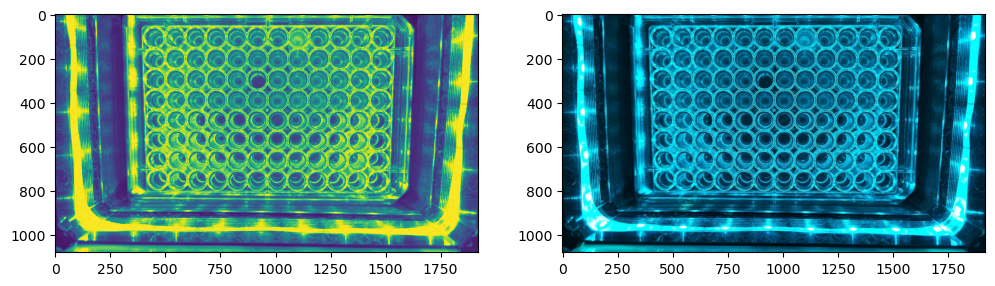

array([[130, 150, 135, 130, 126, 127, 128, 181, 133, 134, 144, 126],
       [138, 141, 129, 122, 119, 115, 117, 126, 123, 128, 132, 141],
       [132, 141, 133, 125, 122,  86, 120, 128, 129, 130, 131, 129],
       [130, 146, 131, 126, 122, 120, 121, 133, 134, 132, 131, 131],
       [136, 153, 141, 130, 108, 126, 100, 131, 141, 140, 155, 125],
       [141, 164, 152, 147, 120, 123, 110, 122, 134, 152, 160, 118],
       [160, 177, 168, 153, 140, 134, 130, 138, 142, 156, 172, 136],
       [126, 148, 127, 114, 111, 108, 108, 108, 118, 133, 146, 123]])

In [38]:
mean_output_array = np.zeros((8,12))
q_output_array = np.zeros((8,12))

for i, position in enumerate(grid_positions):
    cropped_pocillo = circle_crop(img, new_circles[i,0:3])
    cropped_pocillo = cropped_pocillo[:,:,2]
    pixel_values = cropped_pocillo[cropped_pocillo != 0].flatten()
    pixel_values = remove_outliers(pixel_values)
    mean_output_array[position[0], position[1]] = np.mean(pixel_values)
    q_output_array[position[0], position[1]] = np.percentile(cropped_pocillo[cropped_pocillo != 0], 90)  

fig, axs = plt.subplots(1,2,figsize=(12, 12))   
axs[0].imshow(img[:,:,2])
axs[1].imshow(img)
plt.show()

#print(position)
#plt.imshow(cropped_pocillo)
#plt.show()

mean_output_array.astype(int)
#q_output_array.astype(int)

In [39]:
key_positions = mean_output_array[:4, 1:11]
print("Mean:", round(np.mean(key_positions),1))
print("Standard deviation:", round(np.std(key_positions),1))

Mean: 130.0
Standard deviation: 13.1


### Saturation average

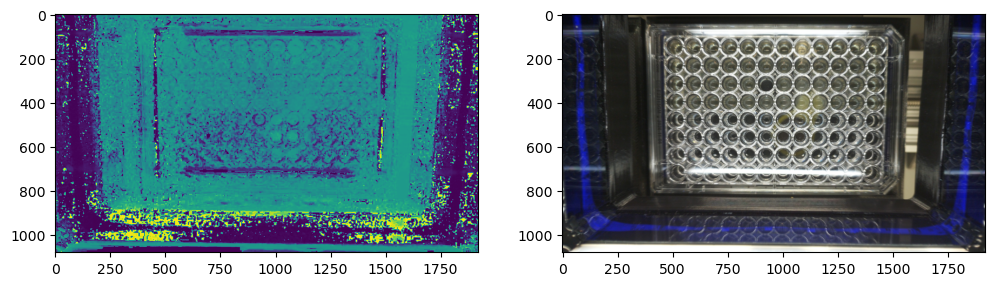

array([[28, 27, 13, 11, 15, 18, 18, 18, 12, 12, 22, 18],
       [27, 30, 26, 25, 27, 28, 29, 34, 26, 27, 27, 22],
       [28, 31, 27, 27, 25, 15, 26, 24, 27, 27, 28, 29],
       [25, 29, 29, 27, 27, 24, 26, 54, 34, 27, 29, 32],
       [25, 17, 13, 12, 13, 18, 43, 39, 16, 13, 16, 22],
       [25, 14, 13, 11, 10, 12, 18, 18, 12, 12, 15, 23],
       [17, 14, 10, 11, 12, 11, 15, 15, 13, 13, 15, 17],
       [24, 19, 16, 17, 18, 17, 18, 18, 19, 17, 21, 30]])

In [53]:
img = cv2.imread(low_od_cam3)
hsv = cv2.cvtColor(img, cv2.COLOR_RGB2HSV)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

mean_output_array = np.zeros((8,12))
q_output_array = np.zeros((8,12))

for i, position in enumerate(grid_positions):
    cropped_pocillo = circle_crop(hsv, new_circles[i,0:3])
    cropped_pocillo = cropped_pocillo[:,:,1]
    pixel_values = cropped_pocillo[cropped_pocillo != 0].flatten()
    pixel_values = remove_outliers(pixel_values)
    mean_output_array[position[0], position[1]] = np.mean(pixel_values)
    q_output_array[position[0], position[1]] = np.percentile(pixel_values, 50)  

fig, axs = plt.subplots(1,2,figsize=(12, 12))   
axs[0].imshow(hsv[:,:,0])
axs[1].imshow(img)
plt.show()

#print(position)
#plt.imshow(cropped_pocillo)
#plt.show()

mean_output_array.astype(int)
#q_output_array.astype(int)

In [51]:
key_positions = mean_output_array[:4, 1:11]
print("Mean:", round(np.mean(key_positions),1))
print("Standard deviation:", round(np.std(key_positions),1))

Mean: 25.7
Standard deviation: 7.5


# Results

In [42]:
results_df = pd.DataFrame({'MeasureType':['Blue','Saturation'],
'ValuesRange': ['130-165', '25-53'],
'Variance': ['6.7-13.1', '5.7-7.5']})

results_df

,MeasureType,ValuesRange,Variance
0,Blue,130-165,6.7-13.1
1,Saturation,25-53,5.7-7.5
